In [1]:
%matplotlib notebook

In [2]:
# Dependencies.
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Establish file paths for csv files.
csv_path_5 = Path("Resources/NIBRS_ARRESTEE.csv")
csv_path_18 = Path("Resources/NIBRS_OFFENDER.csv")
csv_path_19 = Path("Resources/NIBRS_OFFENSE.csv")
csv_path_20 = Path("Resources/NIBRS_OFFENSE_TYPE.csv")
csv_path_23 = Path("Resources/NIBRS_PROPERTY.csv")
csv_path_30 = Path("Resources/NIBRS_VICTIM.csv")
csv_path_31 = Path("Resources/NIBRS_LOCATION_TYPE.csv")
csv_path_32 = Path("Resources/REF_RACE.csv")
csv_path_33 = Path("Resources/NIBRS_ETHNICITY.csv")

In [4]:
# Read in the csv files.
csv_5 = pd.read_csv(csv_path_5)
csv_18 = pd.read_csv(csv_path_18)
csv_19 = pd.read_csv(csv_path_19)
csv_20 = pd.read_csv(csv_path_20)
csv_23 = pd.read_csv(csv_path_23)
csv_30 = pd.read_csv(csv_path_30)
csv_31 = pd.read_csv(csv_path_31)
csv_32 = pd.read_csv(csv_path_32)
csv_33 = pd.read_csv(csv_path_33)

In [5]:
# Merge files
Incident_ID = pd.merge(csv_5, csv_19, on = "INCIDENT_ID", how = "outer")
Incident_ID_2 = pd.merge(Incident_ID, csv_18, on = "INCIDENT_ID", how = "inner")
Unique = len(Incident_ID_2["INCIDENT_ID"].unique())
Unique

461161

In [6]:
# Find number of rows and columns
Incident_ID_2.shape

(740072, 35)

In [7]:
# Create function
def get_offense(ID):
    return csv_20.loc[csv_20["OFFENSE_TYPE_ID"] == ID, "OFFENSE_CATEGORY_NAME"]

In [8]:
# Associate offense ID number with type of offense
Incident_ID_2["OFFENSE_TYPE"] = ""
for index, row in Incident_ID_2.iterrows():
    Incident_ID_2.loc[index, "OFFENSE_TYPE"] = (get_offense(row["OFFENSE_TYPE_ID_y"]).values[0])

In [9]:
# Find number of different offenses 
Incident_ID_2.loc[0, "OFFENSE_TYPE_ID_y"]

16

In [10]:
# Print df
Incident_ID_2.head()

,DATA_YEAR_x,ARRESTEE_ID,INCIDENT_ID,ARRESTEE_SEQ_NUM,ARREST_DATE,ARREST_TYPE_ID,MULTIPLE_INDICATOR,OFFENSE_TYPE_ID_x,AGE_ID_x,AGE_NUM_x,...,OFFENDER_ID,OFFENDER_SEQ_NUM,AGE_ID_y,AGE_NUM_y,SEX_CODE_y,RACE_ID_y,ETHNICITY_ID_y,AGE_RANGE_LOW_NUM_y,AGE_RANGE_HIGH_NUM_y,OFFENSE_TYPE
0,2018.0,32122486.0,107758111,2.0,17-AUG-18,3.0,N,48.0,5.0,33.0,...,121952436,2,5.0,24.0,F,1.0,2.0,24.0,0.0,Drug/Narcotic Offenses
1,2018.0,32122486.0,107758111,2.0,17-AUG-18,3.0,N,48.0,5.0,33.0,...,121952435,1,5.0,33.0,M,1.0,2.0,33.0,0.0,Drug/Narcotic Offenses
2,2018.0,32122486.0,107758111,2.0,17-AUG-18,3.0,N,48.0,5.0,33.0,...,121952436,2,5.0,24.0,F,1.0,2.0,24.0,0.0,Drug/Narcotic Offenses
3,2018.0,32122486.0,107758111,2.0,17-AUG-18,3.0,N,48.0,5.0,33.0,...,121952435,1,5.0,33.0,M,1.0,2.0,33.0,0.0,Drug/Narcotic Offenses
4,2018.0,32122485.0,107758111,1.0,17-AUG-18,2.0,N,35.0,5.0,24.0,...,121952436,2,5.0,24.0,F,1.0,2.0,24.0,0.0,Drug/Narcotic Offenses


In [11]:
# Get visual of df format
#Incident_ID_2.to_csv("..2018/Incident_ID_2.csv", index=False, header=True)

In [12]:
# Merge to get location type, print df
Incident_ID_3 = pd.merge(Incident_ID_2, csv_31, on = "LOCATION_ID", how = "inner")
Incident_ID_3.head()

,DATA_YEAR_x,ARRESTEE_ID,INCIDENT_ID,ARRESTEE_SEQ_NUM,ARREST_DATE,ARREST_TYPE_ID,MULTIPLE_INDICATOR,OFFENSE_TYPE_ID_x,AGE_ID_x,AGE_NUM_x,...,AGE_ID_y,AGE_NUM_y,SEX_CODE_y,RACE_ID_y,ETHNICITY_ID_y,AGE_RANGE_LOW_NUM_y,AGE_RANGE_HIGH_NUM_y,OFFENSE_TYPE,LOCATION_CODE,LOCATION_NAME
0,2018.0,32122486.0,107758111,2.0,17-AUG-18,3.0,N,48.0,5.0,33.0,...,5.0,24.0,F,1.0,2.0,24.0,0.0,Drug/Narcotic Offenses,18,Parking/Drop Lot/Garage
1,2018.0,32122486.0,107758111,2.0,17-AUG-18,3.0,N,48.0,5.0,33.0,...,5.0,33.0,M,1.0,2.0,33.0,0.0,Drug/Narcotic Offenses,18,Parking/Drop Lot/Garage
2,2018.0,32122486.0,107758111,2.0,17-AUG-18,3.0,N,48.0,5.0,33.0,...,5.0,24.0,F,1.0,2.0,24.0,0.0,Drug/Narcotic Offenses,18,Parking/Drop Lot/Garage
3,2018.0,32122486.0,107758111,2.0,17-AUG-18,3.0,N,48.0,5.0,33.0,...,5.0,33.0,M,1.0,2.0,33.0,0.0,Drug/Narcotic Offenses,18,Parking/Drop Lot/Garage
4,2018.0,32122485.0,107758111,1.0,17-AUG-18,2.0,N,35.0,5.0,24.0,...,5.0,24.0,F,1.0,2.0,24.0,0.0,Drug/Narcotic Offenses,18,Parking/Drop Lot/Garage


In [13]:
# Remove unnecessary columns
Incident_ID_4 = Incident_ID_3.drop(["DATA_YEAR_x", "ARRESTEE_ID", "OFFENSE_TYPE_ID_x", 
                                    "AGE_ID_x", "AGE_NUM_x", "SEX_CODE_x", "ETHNICITY_ID_x", 
                                    "INCIDENT_ID", "ARRESTEE_SEQ_NUM","MULTIPLE_INDICATOR", 
                                    "RACE_ID_x", "RESIDENT_CODE", "UNDER_18_DISPOSITION_CODE", 
                                    "CLEARANCE_IND", "AGE_RANGE_LOW_NUM_x", "AGE_RANGE_HIGH_NUM_x", 
                                    "DATA_YEAR_y", "ATTEMPT_COMPLETE_FLAG", "NUM_PREMISES_ENTERED", "METHOD_ENTRY_CODE", 
                                    "OFFENDER_SEQ_NUM", "AGE_RANGE_LOW_NUM_y", "AGE_RANGE_HIGH_NUM_y"], axis=1)
Incident_ID_4.head()

,ARREST_DATE,ARREST_TYPE_ID,OFFENSE_ID,OFFENSE_TYPE_ID_y,LOCATION_ID,DATA_YEAR,OFFENDER_ID,AGE_ID_y,AGE_NUM_y,SEX_CODE_y,RACE_ID_y,ETHNICITY_ID_y,OFFENSE_TYPE,LOCATION_CODE,LOCATION_NAME
0,17-AUG-18,3.0,132204096,16,18,2018,121952436,5.0,24.0,F,1.0,2.0,Drug/Narcotic Offenses,18,Parking/Drop Lot/Garage
1,17-AUG-18,3.0,132204096,16,18,2018,121952435,5.0,33.0,M,1.0,2.0,Drug/Narcotic Offenses,18,Parking/Drop Lot/Garage
2,17-AUG-18,3.0,132204097,35,18,2018,121952436,5.0,24.0,F,1.0,2.0,Drug/Narcotic Offenses,18,Parking/Drop Lot/Garage
3,17-AUG-18,3.0,132204097,35,18,2018,121952435,5.0,33.0,M,1.0,2.0,Drug/Narcotic Offenses,18,Parking/Drop Lot/Garage
4,17-AUG-18,2.0,132204096,16,18,2018,121952436,5.0,24.0,F,1.0,2.0,Drug/Narcotic Offenses,18,Parking/Drop Lot/Garage


In [14]:
# Create function
def get_race(ID):
    return csv_32.loc[csv_32["RACE_ID"] == ID, "RACE_DESC"]

In [15]:
# Associate race ID number with description of race
Incident_ID_4["RACE"] = ""
try:   
    for index, row in Incident_ID_4.iterrows():
        Incident_ID_4.loc[index, "RACE"] = (get_race(row["RACE_ID_y"]).values[0])
except:
    print("missing value")

missing value


In [16]:
# Create function
def get_ethnicity(ID):
    return csv_33.loc[csv_33["ETHNICITY_ID"] == ID, "ETHNICITY_NAME"]

In [17]:
# Associate ethnicity ID number with description of ethnicity
Incident_ID_4["ETHNICITY"] = ""
try:   
    for index, row in Incident_ID_4.iterrows():
        Incident_ID_4.loc[index, "ETHNICITY"] = (get_ethnicity(row["ETHNICITY_ID_y"]).values[0])
except:
    print("missing value")

missing value


In [18]:
Incident_ID_4.head()

,ARREST_DATE,ARREST_TYPE_ID,OFFENSE_ID,OFFENSE_TYPE_ID_y,LOCATION_ID,DATA_YEAR,OFFENDER_ID,AGE_ID_y,AGE_NUM_y,SEX_CODE_y,RACE_ID_y,ETHNICITY_ID_y,OFFENSE_TYPE,LOCATION_CODE,LOCATION_NAME,RACE,ETHNICITY
0,17-AUG-18,3.0,132204096,16,18,2018,121952436,5.0,24.0,F,1.0,2.0,Drug/Narcotic Offenses,18,Parking/Drop Lot/Garage,White,Not Hispanic or Latino
1,17-AUG-18,3.0,132204096,16,18,2018,121952435,5.0,33.0,M,1.0,2.0,Drug/Narcotic Offenses,18,Parking/Drop Lot/Garage,White,Not Hispanic or Latino
2,17-AUG-18,3.0,132204097,35,18,2018,121952436,5.0,24.0,F,1.0,2.0,Drug/Narcotic Offenses,18,Parking/Drop Lot/Garage,White,Not Hispanic or Latino
3,17-AUG-18,3.0,132204097,35,18,2018,121952435,5.0,33.0,M,1.0,2.0,Drug/Narcotic Offenses,18,Parking/Drop Lot/Garage,White,Not Hispanic or Latino
4,17-AUG-18,2.0,132204096,16,18,2018,121952436,5.0,24.0,F,1.0,2.0,Drug/Narcotic Offenses,18,Parking/Drop Lot/Garage,White,Not Hispanic or Latino


<IPython.core.display.Javascript object>


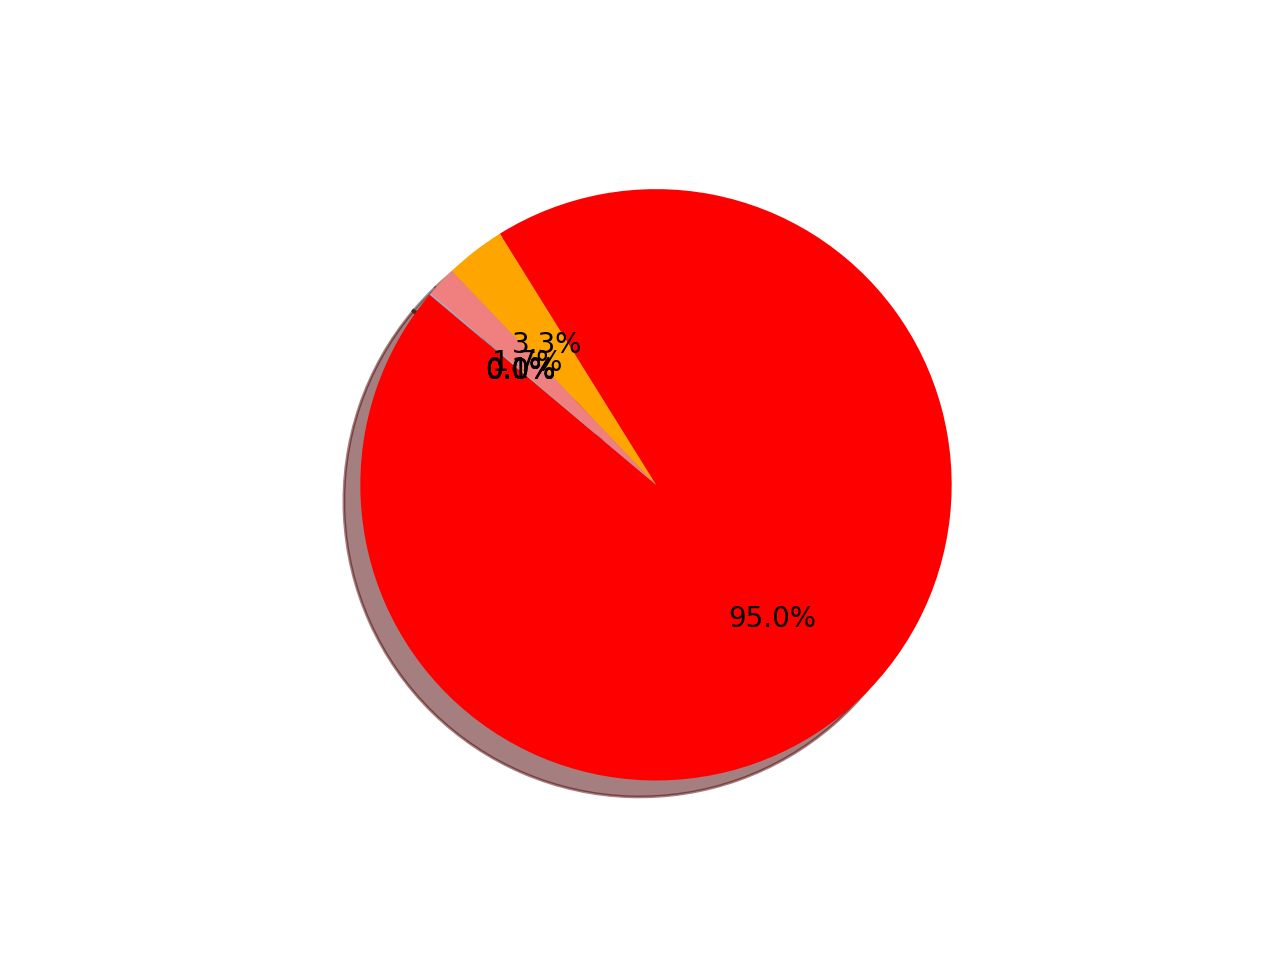

([<matplotlib.patches.Wedge at 0x17c94b1c0>,
 [Text(0.7208067192822127, -0.8309257929788999, ''),
  Text(-0.6740737803242766, 0.8692666671852425, ''),
  Text(-0.8006651516231824, 0.7542780090763793, ''),
  Text(-0.8404144883848694, 0.7097207110637243, ''),
  Text(-0.8420301511983667, 0.7078030972472895, ''),
  Text(-0.8424686627823043, 0.7072810984536462, ''),
  Text(-0.8426127602962742, 0.7071094230639936, '')],
 [Text(0.39316730142666145, -0.4532322507157635, '95.0%'),
  Text(-0.3676766074496054, 0.47414545482831405, '3.3%'),
  Text(-0.43672644633991764, 0.41142436858711595, '1.7%'),
  Text(-0.4584079027553833, 0.3871203878529405, '0.1%'),
  Text(-0.45928917338092723, 0.3860744166803397, '0.0%'),
  Text(-0.45952836151762044, 0.3857896900656252, '0.0%'),
  Text(-0.4596069601616041, 0.38569604894399645, '0.0%')])

In [54]:
#Visual of data 
#race = ["Unknown", "White", "Black or African American", "American Indian or Alaska Native",
        #"Asian", "Asian, Native Hawaiian, or Other Pacific Islander", "Chinese",
        #"Japanese", "Native Hawaiian or Other Pacific Islander", "Other",
        #"Multiple", "Not Specified"]
#labels = pd.value_counts(Incident_ID_4["RACE"])
sizes = pd.value_counts(Incident_ID_4["RACE"], dropna=True)
colors = ["red", "orange", "lightcoral", "lightskyblue"]
plt.pie(sizes, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

In [ ]:
Incident_ID_4["RACE"].unique()

In [55]:
pd.value_counts(Incident_ID_4["RACE"], dropna=True)

RACE
                                             702825
White                                         24300
Black or African American                     12362
Unknown                                         427
Asian                                           110
American Indian or Alaska Native                 36
Native Hawaiian or Other Pacific Islander        12
Name: count, dtype: int64

In [42]:
Incident_ID_4.to_csv("Incident_ID_4.csv")